Churn analysis by segments to analyze where churn is happening and which churn matters most to the business.

In [1]:
import pandas as pd

df = pd.read_csv("../data/processed/Telco_processed.csv")

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Segment
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,2
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,2
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,3


In [2]:
df["Churn"].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [3]:
df.groupby("Segment")["Churn"].mean()

Segment
0    0.050000
1    0.154250
2    0.246624
3    0.482410
Name: Churn, dtype: float64

In [4]:
df["Segment"].value_counts()  #Size of each segment

Segment
3    2274
1    1906
2    1703
0    1160
Name: count, dtype: int64

In [5]:
df[df["Churn"] == 1].groupby("Segment")["MonthlyCharges"].mean()

Segment
0    46.731034
1    98.465306
2    37.465476
3    83.624567
Name: MonthlyCharges, dtype: float64

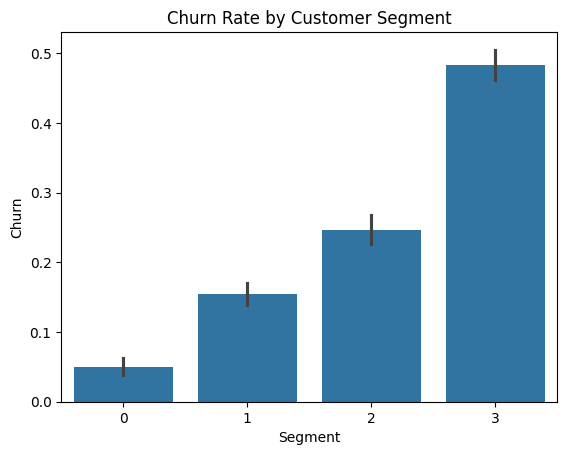

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x="Segment", y="Churn", data=df)
plt.title("Churn Rate by Customer Segment")
plt.show()

The churn rate varies significantly across customer segments. Segment 3 exhibits the highest churn rate at nearly 50%, indicating a high-risk customer group. In contrast, Segment 0 shows strong retention with churn rates below 5%. This demonstrates that customer segmentation successfully identifies distinct risk profiles, enabling the business to focus retention efforts on the most impactful segments.